In [1]:
import tensorflow_probability as tfp
import tensorflow as tf

tfd = tfp.distributions
tfb = tfp.bijectors

In [2]:
z = tf.constant([1., 3., 5.])
tf.math.reduce_mean(z)

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [3]:
# shift the distribution by 2
shift = tfb.Shift(2.)
# scale the distribution by 3
scale = tfb.Scale(2.)

In [4]:
# applies in a inverse opperation [second, first]
scale_and_shift = tfb.Chain([shift, scale]) # scale first and shift second

In [5]:
# apply the forward transformation on the constant distribution z
scale_and_shift_forward = scale_and_shift.forward(z)
tf.math.reduce_mean(scale_and_shift_forward)

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [6]:
scale_and_shift_forward

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 4.,  8., 12.], dtype=float32)>

In [9]:
# apply the inverse operation the the forward to get back the original
scale_and_shift_inverse_forward = scale_and_shift.inverse(scale_and_shift_forward)

In [10]:
scale_and_shift_inverse_forward

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 3., 5.], dtype=float32)>

In [21]:
# now create a simple base distribution from the standard normal distribtuion
normal = tfd.Normal(loc=1., scale=2.)

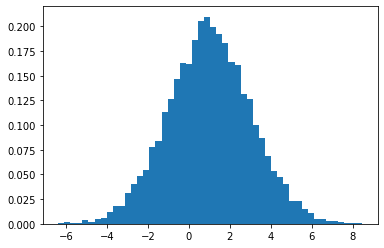

In [22]:
# sample from the distribution and plot in a histogram
%matplotlib inline
import matplotlib.pyplot as plt

n = 10000
z = normal.sample(n)

plt.figure()
plt.hist(z.numpy(), bins=50, density=True)
plt.show()


In [23]:
# lets try to shift this distribution by a mean of 3. and scale it by 2.
scale = tfb.Scale(2.)
shift = tfb.Shift(3.)

scale_and_shift = tfb.Chain([shift, scale])

scale_and_shift_forward = scale_and_shift.forward(z)


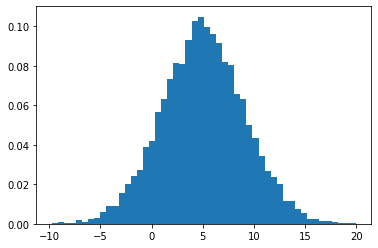

In [24]:
plt.figure()
plt.hist(scale_and_shift_forward.numpy(), bins=50, density=True)
plt.show()

In [26]:
# the distribution z has a log probability log_p(Z=z_i)
log_prob_z = normal.log_prob(z)
log_prob_z

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([-1.6143662, -2.0429473, -2.153543 , ..., -2.162057 , -2.0510213,
       -4.904122 ], dtype=float32)>